In [1]:
#bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
#arquivos csv
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv('sampleSubmission.csv')

In [3]:
#primeiras 5 linhas do dado
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [4]:
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [5]:
#somente dados de quantidade das pessoas que alugaram bike
train['count']

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [ ]:
#dados com weather 1
train.loc[train.weather == 1]

In [ ]:
#dados com weather 2
train.loc[train.weather == 2]

In [16]:
#dados com weather 3
train.loc[train.weather == 3]

datetime  season  holiday  workingday  weather   temp  \
18     2011-01-01 18:00:00       1        0           0        3  17.22   
19     2011-01-01 19:00:00       1        0           0        3  17.22   
29     2011-01-02 06:00:00       1        0           0        3  17.22   
31     2011-01-02 08:00:00       1        0           0        3  16.40   
37     2011-01-02 14:00:00       1        0           0        3  14.76   
...                    ...     ...      ...         ...      ...    ...   
10808  2012-12-16 18:00:00       4        0           0        3  15.58   
10818  2012-12-17 04:00:00       4        0           1        3  14.76   
10830  2012-12-17 16:00:00       4        0           1        3  16.40   
10837  2012-12-17 23:00:00       4        0           1        3  17.22   
10850  2012-12-18 12:00:00       4        0           1        3  19.68   

        atemp  humidity  windspeed  casual  registered  count  time  sensacaot  
18     21.210        88    16.9979       9          26     35    18          2  
19     21.210        88    16.9979       6          31     37    19          2  
29     21.210        77    19.9995       0           2      2     6          2  
31     20.455        71    15.0013       0           8      8     8          2  
37     17.425        76    12.9980       4          55     59    14          1  
...       ...       ...        ...     ...         ...    ...   ...        ...  
10808  19.695        82     7.0015       8          99    107    18          1  
10818  18.940       100     0.0000       2           3      5     4          1  
10830  20.455        94    16.9979      15         287    302    16          2  
10837  21.210        94    15.0013       6          41     47    23          2  
10850  23.485        48    16.9979      49         264    313    12          2  

[859 rows x 14 columns]

In [15]:
#dados com weather 4
train.loc[train.weather == 4]

datetime  season  holiday  workingday  weather  temp   atemp  \
5631  2012-01-09 18:00:00       1        0           1        4   8.2  11.365   

      humidity  windspeed  casual  registered  count  time  sensacaot  
5631        86     6.0032       6         158    164    18          1

In [14]:
train.weather.describe()

count    10886.000000
mean         1.418427
std          0.633839
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: weather, dtype: float64

<AxesSubplot: xlabel='weather', ylabel='count'>

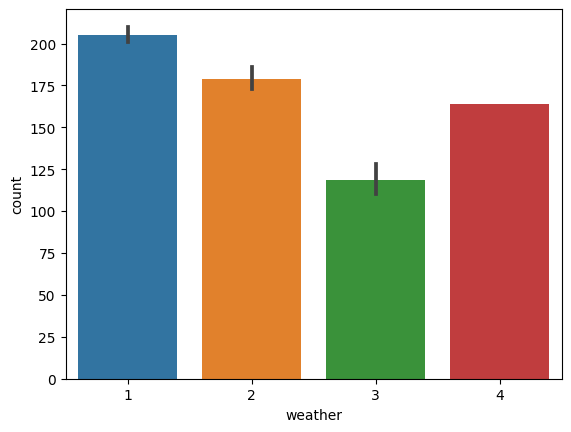

In [13]:
sns.barplot(x="weather", y="count", data=train)

In [6]:
#pegando somente os horarios de datetime
train['time'] = train['datetime'].str[11:13]
train['time']

test['time'] = test['datetime'].str[11:13]
test['time']

0       00
1       01
2       02
3       03
4       04
        ..
6488    19
6489    20
6490    21
6491    22
6492    23
Name: time, Length: 6493, dtype: object

In [7]:
#transformando dtype: object para dtype: int
train['time'] = train['time'].astype(int)
train["time"]

test['time'] = test['time'].astype(int)
test["time"]

0        0
1        1
2        2
3        3
4        4
        ..
6488    19
6489    20
6490    21
6491    22
6492    23
Name: time, Length: 6493, dtype: int32

C:\Users\RinaS\AppData\Local\Temp\ipykernel_16588\1825598753.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = train.corr()


<AxesSubplot: >

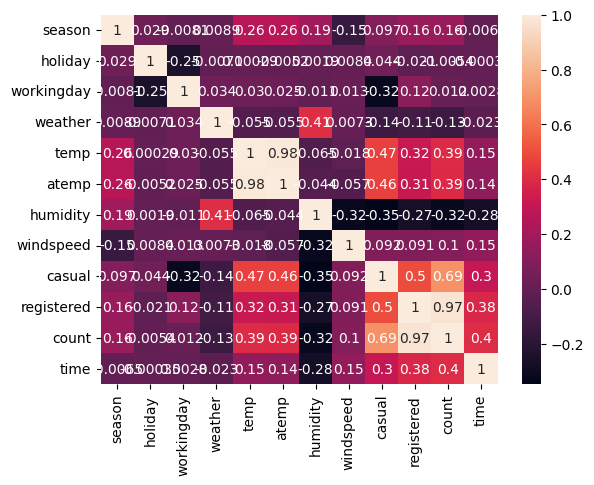

In [8]:
#ver as relações entre os dados
correlacao = train.corr()
plt.figure()
sns.heatmap(data=correlacao, annot=True)

<AxesSubplot: xlabel='time', ylabel='count'>

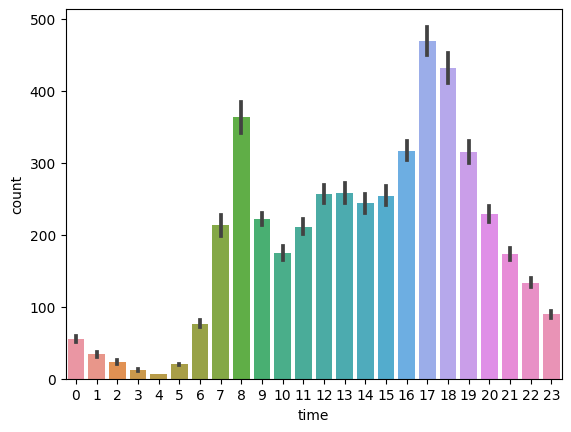

In [9]:
#relação entre horário e aluguel de bike
sns.barplot(x="time", y="count", data=train)

In [10]:
train.atemp.describe()

count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64

In [11]:
#lista criada a partir de 'atemp' para medir o indicador: 0 = Muito Frio, 1 = Frio, 2 = Ameno, 3 = Quente
sensacaot_train = []

for atemp in train["atemp"]:
  if atemp < 10:
    sensacaot_train.append(0)
  elif atemp < 20:
    sensacaot_train.append(1)
  elif atemp < 30:
    sensacaot_train.append(2)
  else:
    sensacaot_train.append(3)

train["sensacaot"] = sensacaot_train

#mesma coisa porém com dados de test
sensacaot_test = []

for atemp in test["atemp"]:
  if atemp < 10:
    sensacaot_test.append(0)
  elif atemp < 20:
    sensacaot_test.append(1)
  elif atemp < 30:
    sensacaot_test.append(2)
  else:
    sensacaot_test.append(3)

test["sensacaot"] = sensacaot_test


<AxesSubplot: xlabel='sensacaot', ylabel='count'>

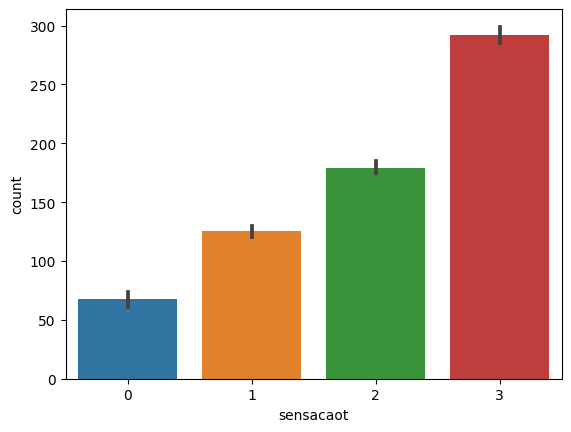

In [12]:
#relação de sensação termica e bikes alugadas
sns.barplot(x="sensacaot", y="count", data=train)

In [ ]:
#coluna de previsão é y
y = test.count

In [ ]:
#recursos
test_features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'time', 'sensacaot']
#coluna de recursos é x
x_test = test[test_features]

In [ ]:
x_test.describe()

In [ ]:
x_test.head()

In [ ]:
x_test.isnull().sum()

In [ ]:
from sklearn.tree import DecisionTreeRegressor